## **Loading Dataset**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#A = https://drive.google.com/file/d/1Wmc9HANJTJNY2G1-t6MqQGEdqL4SzI42/view?usp=sharing
fileDownloaded = drive.CreateFile({'id' : '1Wmc9HANJTJNY2G1-t6MqQGEdqL4SzI42'})
fileDownloaded.GetContentFile('A')

In [ ]:
df = pd.read_csv('A',delimiter=',')

## **Data Exploration**

In [ ]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.shape

(5110, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


เช็คชนิดข้อมูลของแต่ละคอลัมน์

In [ ]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fccba7b0ad0>,
      dtype=object)

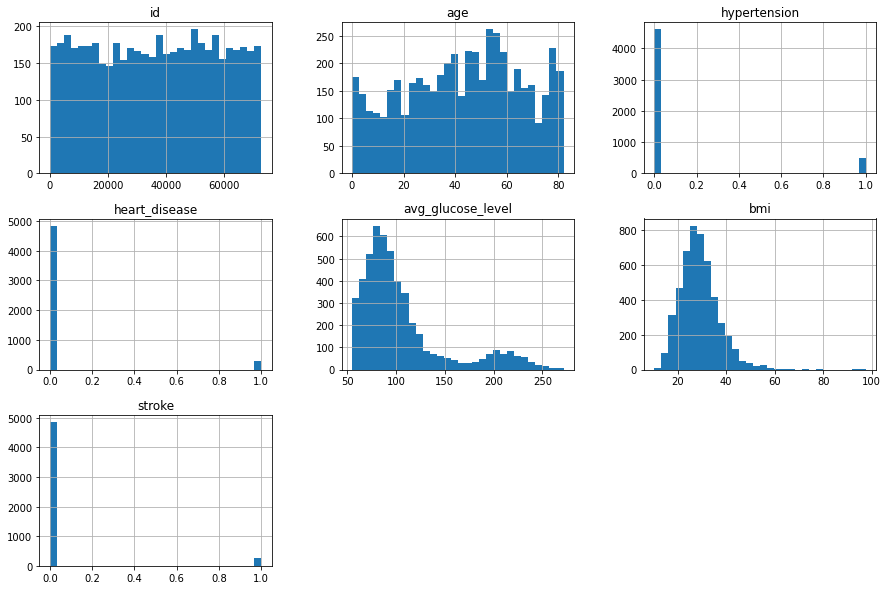

In [ ]:
df.hist(bins=30, figsize=(15, 10))

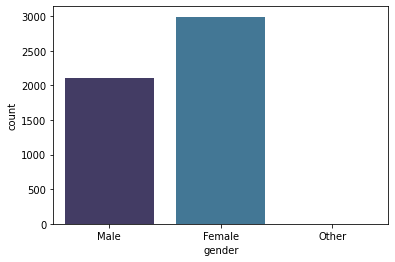

In [ ]:
sns.countplot(x='gender',data=df,palette='mako')

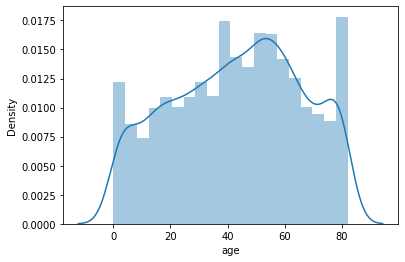

In [ ]:
sns.distplot(df['age'])
#sns.histplot(data=df, x="age")

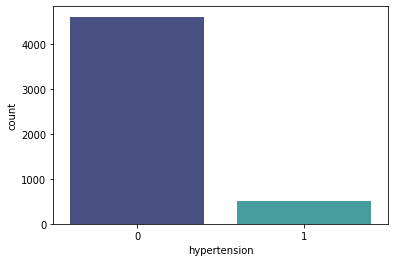

In [ ]:
sns.countplot(x='hypertension',data=df,palette='mako')

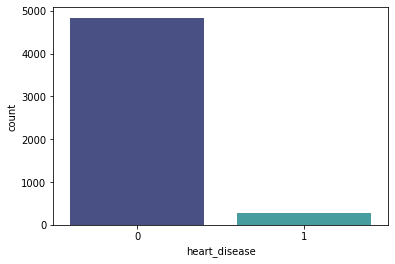

In [ ]:
sns.countplot(x='heart_disease',data=df,palette='mako')

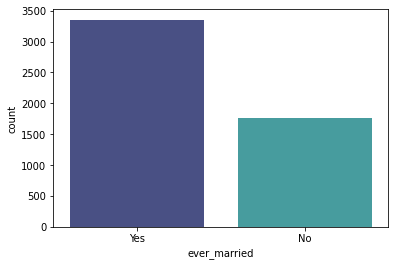

In [ ]:
sns.countplot(x='ever_married',data=df,palette='mako')

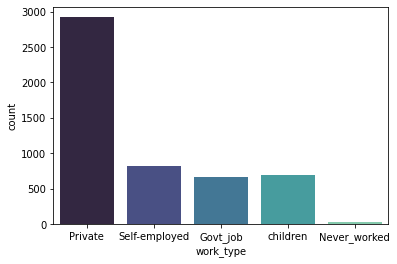

In [ ]:
sns.countplot(x='work_type',data=df,palette='mako')

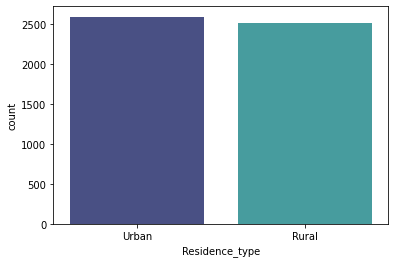

In [ ]:
sns.countplot(x='Residence_type',data=df,palette='mako')

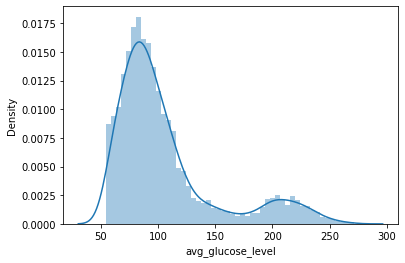

In [ ]:
sns.distplot(df['avg_glucose_level'])

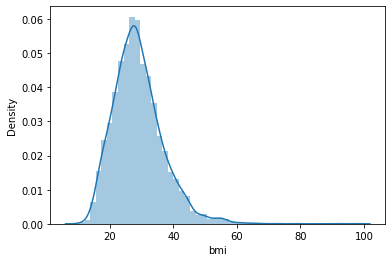

In [ ]:
sns.distplot(df['bmi'])

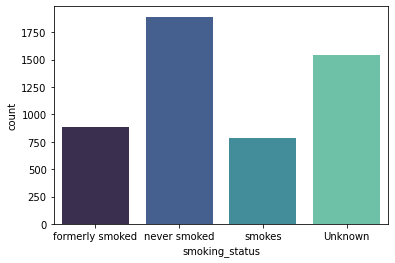

In [ ]:
sns.countplot(x='smoking_status',data=df,palette='mako')

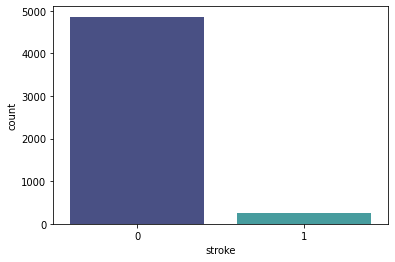

In [ ]:
sns.countplot(x='stroke',data=df,palette='mako')

In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

## **Data Cleansing**

1. ตรวจเช็คค่า Null ในแต่ละคอลัมน์

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

แทนค่า null ในคอลัมน์ 'bmi' ด้วยค่าเฉลี่ย (Mean)

In [ ]:
df['bmi'].fillna(value=df['bmi'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

เปลี่ยนเพศ other ให้เป็นเหลือเพียงเพศชายและหญิง โดยแทนที่ด้วยเพศที่มากกว่า

In [ ]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
df['gender'] = df['gender'].replace('Other', list(df.gender.mode().values)[0])
df.gender.value_counts()

Female    2995
Male      2115
Name: gender, dtype: int64

2. ทำการ ทำการ maping ตัวแปรที่เป็น nominal data ให้เป็นตัวเลขโดย




*   ข้อมูลในคอลัมน์ work_type

> 'Private' -> 0

> Self-employed'-> 1

> 'Govt_job'-> 2

> 'children'-> 3

> 'Never_worked'-> 4


*  ข้อมูลในคอลัมน์ gender


> Male'->0

>'Female'->1


*   ข้อมูลในคอลัมน์ Residence_type


> 'Urban'->0

> 'Rural'->1


*   ข้อมูลในคอลัมน์ smoking_status (ทำการจัดกลุ่มให้ คนที่เคยสูบและสูบอยู่ในกลุ่มเดียวกัน และ ไม่ทราบกับไม่เคยสูบอยู่กลุ่มเดียวกัน)


> 'Unknown'->0

> 'never smoked'->0

> 'smokes'->1

> 'formerly smoked'->1


*   ข้อมูลในคอลัมน์ ever_married


> Yes'->0

> 'No'->1









In [ ]:
data = df.copy()
data['bmi'].fillna(value=df['bmi'].mean(), inplace=True)

In [ ]:
data['work_type'] = data['work_type'].map({'Private':0, 'Self-employed': 1, 'Govt_job':2, 'children':3, 'Never_worked':4})

In [ ]:
data['gender'] = data['gender'].map({'Male':0, 'Female':1})
data['Residence_type'] = data['Residence_type'].map({'Urban':0, 'Rural':1})
data['smoking_status'] = data['smoking_status'].map({'formerly smoked':1, 'never smoked':0, 'smokes':1, 'Unknown':0})
data['ever_married'] = data['ever_married'].map({'Yes':0, 'No':1})

3. เนื่องจากในคอลัมน์ age มีค่าที่ติดทศนิยม จึงทำการเอาค่าทศนิยมออกไป

In [ ]:
data['age'] = df['age'].astype('int')

In [ ]:
data['age'].dtypes

dtype('int64')

4. ทำการ drop คอลัมน์ 'id' ทิ้ง เนื่องจากไม่ใช่ตัวแปรที่มีผลต่อการทำนาย Target class

In [ ]:
data.drop(['id'], axis=1, inplace=True)

In [ ]:
data.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67,0,1,0,0,0,228.69,36.600000,1,1
1,1,61,0,0,0,1,1,202.21,28.893237,0,1
2,0,80,0,1,0,0,1,105.92,32.500000,0,1
3,1,49,0,0,0,0,0,171.23,34.400000,1,1
4,1,79,1,0,0,1,1,174.12,24.000000,0,1


In [ ]:
data.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,1,80,1,0,0,0,0,83.75,28.893237,0,0
5106,1,81,0,0,0,1,0,125.20,40.000000,0,0
5107,1,35,0,0,0,1,1,82.99,30.600000,0,0
5108,0,51,0,0,0,0,1,166.29,25.600000,1,0
5109,1,44,0,0,0,2,0,85.28,26.200000,0,0


# **Correlation**


In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,0.027726,-0.021275,-0.085717,-0.029936,-0.065963,-0.005937,-0.054580,0.025464,-0.043294,-0.009117
age,0.027726,1.000000,0.276303,0.263668,-0.679181,-0.413852,-0.014169,0.238060,0.326271,0.247425,0.245128
hypertension,-0.021275,0.276303,1.000000,0.108306,-0.164243,-0.075097,0.007913,0.174474,0.160189,0.071503,0.127904
heart_disease,-0.085717,0.263668,0.108306,1.000000,-0.114644,-0.058263,-0.003092,0.161857,0.038899,0.087775,0.134914
ever_married,-0.029936,-0.679181,-0.164243,-0.114644,1.000000,0.375944,0.006261,-0.155068,-0.335705,-0.219091,-0.108340
work_type,-0.065963,-0.413852,-0.075097,-0.058263,0.375944,1.000000,-0.014573,-0.068135,-0.341973,-0.193741,-0.058224
Residence_type,-0.005937,-0.014169,0.007913,-0.003092,0.006261,-0.014573,1.000000,0.004946,0.000120,-0.027163,-0.015458
avg_glucose_level,-0.054580,0.238060,0.174474,0.161857,-0.155068,-0.068135,0.004946,1.000000,0.168751,0.068501,0.131945
bmi,0.025464,0.326271,0.160189,0.038899,-0.335705,-0.341973,0.000120,0.168751,1.000000,0.149945,0.038947
smoking_status,-0.043294,0.247425,0.071503,0.087775,-0.219091,-0.193741,-0.027163,0.068501,0.149945,1.000000,0.058931


จากรูปด้านบน เราจะเห็นได้ว่า
* ตัวแปร stroke กับ age มีความสัมพันธ์แบบ weak positive correlation 
* แทบจะทุกตัวแปรไม่มีความสัมพันธ์กับ target (stroke) เลย
* เช่นเดียวกันกับตัวแปรอื่นๆ จำนวนมากมีค่าความสัมพันธ์ดังกล่าว ถึงแม้จะสัมพันธ์กันน้อยมาก เราไม่สามารถลบตัวแปรใดๆ ได้ เราต้องพิจารณาตัวแปรทั้งหมดที่เกี่ยวข้องกับ target ของเราให้ได้มากที่สุด


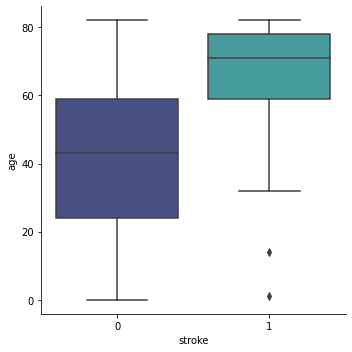

In [ ]:
sns.catplot(x='stroke', y='age', kind='box', data = data,palette='mako')

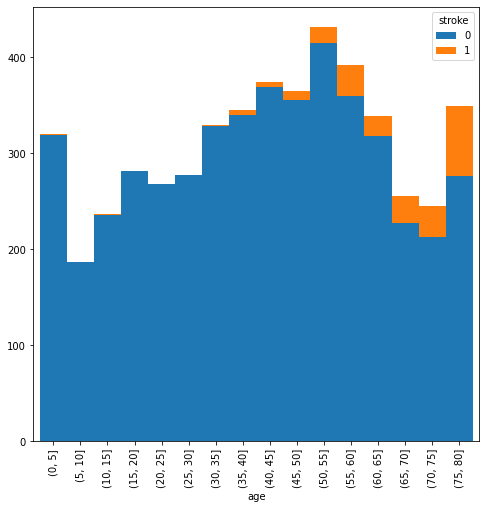

In [ ]:
dfbar = data.groupby([pd.cut(df['age'], np.arange(0, 83, 5)), 'stroke'])['age'].count()
dfbar = dfbar.unstack()    
dfbar.plot.bar(stacked=True, figsize=(8,8), width=1);

จากรูปจะเห็นได้ว่า อายุยิ่งมากขึ้น ยิ่งมีโอกาสเป็นโรคหลอดเลือดสมองมากขึ้น อีกทั้งยังบอกได้อีกว่าคนที่เป็นหลอดเลือดสมองอยู่ในช่วงอายุเฉลี่ย 70 ปี

In [ ]:
def bar_chart(column, width = 0.5):
    df_barchart = data.groupby([column, 'stroke'])['age'].count()
    df_total = data.groupby([column])['age'].count()
    df_pct = df_barchart/ df_total * 100
    df_pct = df_pct.unstack()
    return df_pct.plot.bar(stacked=True, figsize=(6,6), width=width)

In [ ]:
def total(ax):
  totals = []
  for i in ax.patches:
    totals.append(i.get_height())
  total = sum(totals)
  for i in ax.patches:
    ax.text(i.get_x()+.08, i.get_height()-5,str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,color='Black', weight = 'bold')  
  plt.tight_layout()

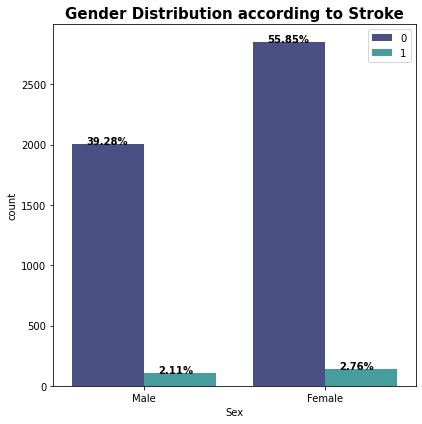

In [ ]:
ax = plt.subplots(figsize=(6,6))
name = ["Male", "Female"]
ax = sns.countplot(x='gender', hue='stroke', data=data,palette='mako')
ax.set_title("Gender Distribution according to Stroke", fontsize = 15, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)
plt.xlabel('Sex', fontsize = 10, weight = 'regular')
plt.ylabel('count', fontsize = 10, weight = 'regular')
L=plt.legend()

total(ax)

จากรูปเพศชายมีความเสี่ยงที่จะเป็นโรคหลอดเลือดสมองมากกว่าเพศหญิงเมื่อเทียบกับคนทั้งหมด

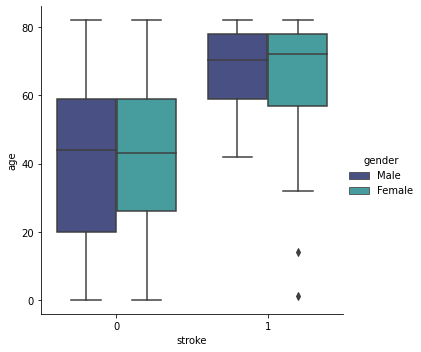

In [ ]:
sns.catplot(x='stroke', y="age", hue='gender', kind="box", data=df,palette='mako')

จากรูปผู้สูงอายุเพศหญิงมีความเสี่ยงที่จะเป็นโรคหลอดเลือดสมอง

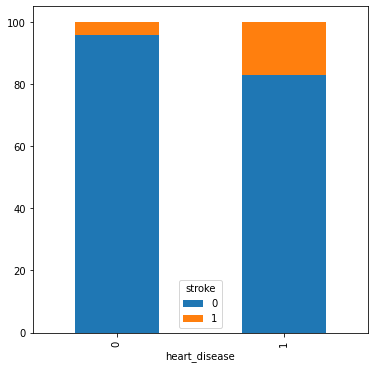

In [ ]:
bar_chart('heart_disease')

In [ ]:
# sns.catplot(x='stroke', y="heart_disease", kind="bar", data=data,palette='mako')

คนที่เป็นโรคหัวใจมีความเสี่ยงสูงที่จะเป็นโรคหลอดเลือดสมองด้วย

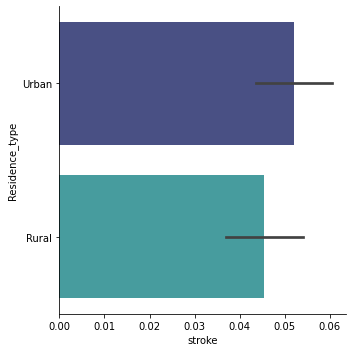

In [ ]:
sns.catplot(x='stroke', y='Residence_type', kind='bar', data = df,palette='mako')

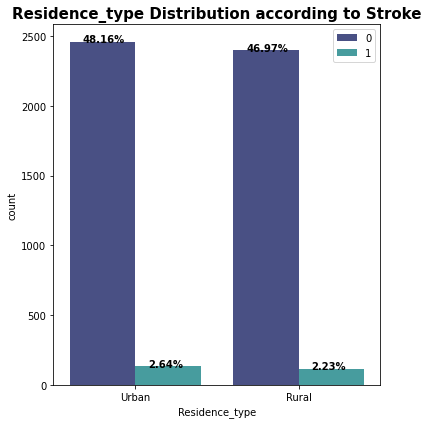

In [ ]:
ax = plt.subplots(figsize=(6,6))
name = ["Urban", "Rural"]
ax = sns.countplot(x='Residence_type', hue='stroke', data=data,palette='mako')
ax.set_title("Residence_type Distribution according to Stroke", fontsize = 15, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)
plt.xlabel('Residence_type', fontsize = 10, weight = 'regular')
plt.ylabel('count', fontsize = 10, weight = 'regular')
L=plt.legend()

total(ax)

จากภาพจะเห็นได้ว่าคนที่อยู่ในเมืองมีความเสี่ยงที่จะเป็นโรคหลอดเลือดสมองมากกว่าคนที่อยู่ในแถบชนบท 

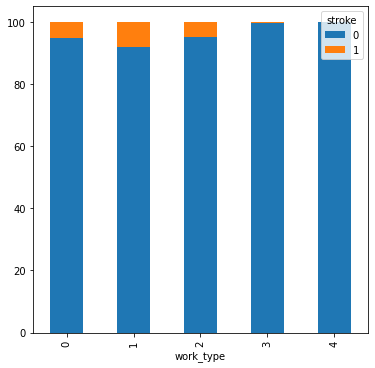

In [ ]:
bar_chart('work_type')

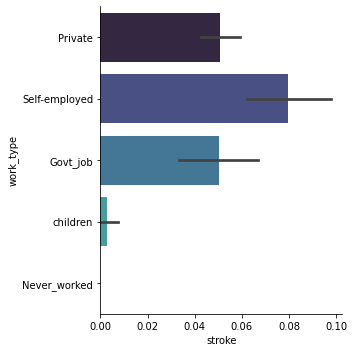

In [ ]:
sns.catplot(x='stroke', y='work_type', kind='bar', data = df,palette='mako')

คนที่ทำงานด้วยตนเองมีความเสี่ยงสูงที่จะเป็นโรคหลอดเลือดสมอง นี่แสดงให้เห็นว่าคนเหล่านี้มีความเสี่ยงต่อการเป็นโรคต่างๆ มากขึ้น เนื่องจากพวกเขาแบกรับภาระรายได้และรายได้ของครอบครัวจำนวนมาก

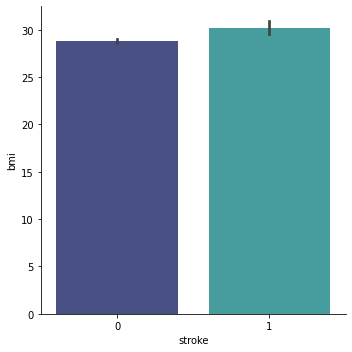

In [ ]:
sns.catplot(x='stroke', y="bmi", kind="bar", data=df,palette='mako')

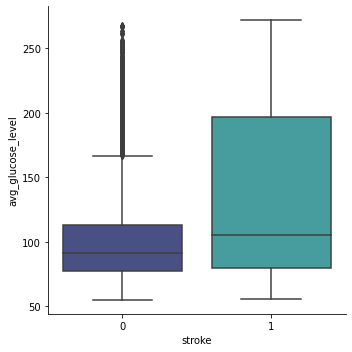

In [ ]:
sns.catplot(x='stroke', y="avg_glucose_level", kind="box", data=df,palette='mako')

คนที่มีระดับกลูโคสสูงกว่ามีความเสี่ยงสูงที่จะเป็นโรคหลอดเลือดสมอง

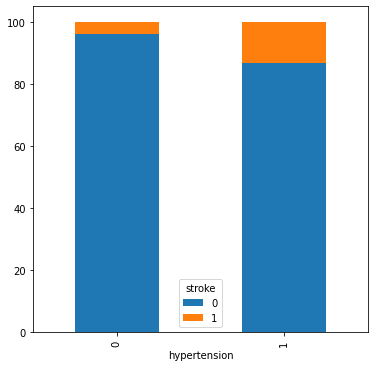

In [ ]:
bar_chart('hypertension')

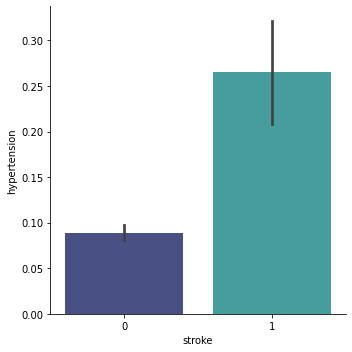

In [ ]:
sns.catplot(x='stroke', y="hypertension", kind="bar", data=df,palette='mako')

คนที่มีความดันโลหิตสูงมีความเสี่ยงสูงที่จะเป็นโรคหลอดเลือดสมองด้วย

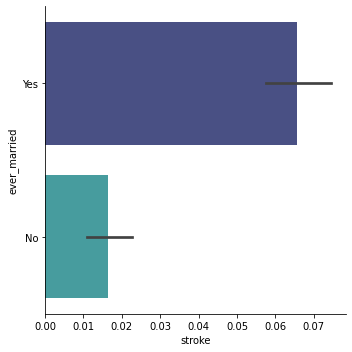

In [ ]:
sns.catplot(x='stroke', y="ever_married", kind="bar", data=df,palette='mako')

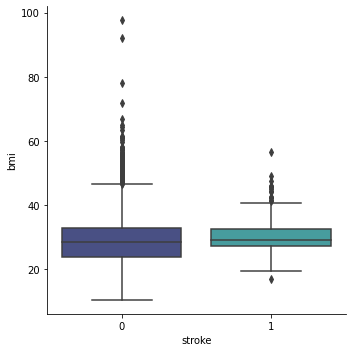

In [ ]:
sns.catplot(x='stroke', y="bmi", kind="box", data=df,palette='mako')

# **Logistic Regression**

In [ ]:
data_feature = data.loc[: , data.columns != 'stroke']
data_target = data.loc[: , data.columns == 'stroke']

In [ ]:
data_feature

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,67,0,1,0,0,0,228.69,36.600000,1
1,1,61,0,0,0,1,1,202.21,28.893237,0
2,0,80,0,1,0,0,1,105.92,32.500000,0
3,1,49,0,0,0,0,0,171.23,34.400000,1
4,1,79,1,0,0,1,1,174.12,24.000000,0
...,...,...,...,...,...,...,...,...,...,...
5105,1,80,1,0,0,0,0,83.75,28.893237,0
5106,1,81,0,0,0,1,0,125.20,40.000000,0
5107,1,35,0,0,0,1,1,82.99,30.600000,0
5108,0,51,0,0,0,0,1,166.29,25.600000,1


In [ ]:
data_target

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_feature, data_target, shuffle=True ,random_state=0)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test,y_test)))

Training set score: 0.952
Test set score: 0.949


In [ ]:
print(logreg.intercept_)

[-7.89011929]


In [ ]:
col=X_train.columns

In [ ]:
X=X_train[col]
y=y_train.values.flatten()

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.174481
         Iterations 8


In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3832
Model:                          Logit   Df Residuals:                     3822
Method:                           MLE   Df Model:                            9
Date:                Mon, 25 Apr 2022   Pseudo R-squ.:                 0.09423
Time:                        08:40:16   Log-Likelihood:                -668.61
converged:                       True   LL-Null:                       -738.17
Covariance Type:            nonrobust   LLR p-value:                 1.568e-25
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
gender               -0.5143      0.148     -3.469      0.001      -0.805      -0.224
age                   0.0332      0.004      7.709      0.000       0.025       0.042
hypertension          0.6420      0.195      3.285      0.001       0.259       1.025
heart_disease         0.7998      0.218      3.665      0.000       0.372       1.228
ever_married         -0.6846      0.240     -2.856      0.004      -1.154      -0.215
work_type            -0.4231      0.101     -4.207      0.000      -0.620      -0.226
Residence_type       -0.4743      0.153     -3.108      0.002      -0.773      -0.175
avg_glucose_level     0.0001      0.002      0.075      0.941      -0.003       0.003
bmi                  -0.1385      0.010    -13.268      0.000      -0.159      -0.118
smoking_status       -0.1324      0.157     -0.844      0.399      -0.440       0.175
=====================================================================================
"""

In [ ]:
coefficients = result.params
coefficients

gender              -0.514298
age                  0.033219
hypertension         0.641966
heart_disease        0.799839
ever_married        -0.684562
work_type           -0.423108
Residence_type      -0.474301
avg_glucose_level    0.000113
bmi                 -0.138540
smoking_status      -0.132369
dtype: float64

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test))) 

Accuracy on training set: 1.000
Accuracy on test set: 0.912


In [ ]:
from matplotlib import pyplot as plt
import numpy as np

def plot_feature_importances(model):
  n_features = data_feature.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align='center') 
  plt.yticks(np.arange(n_features),featurenames) 
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")


In [ ]:
featurenames= data.columns[:10]

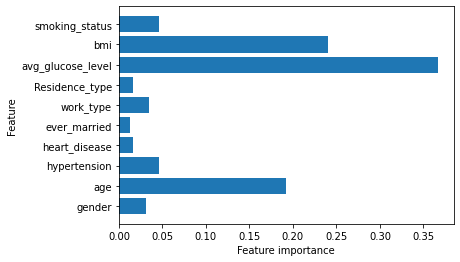

In [ ]:
plot_feature_importances(tree)

In [ ]:
treedata = data.copy()
treedata.drop(['gender','heart_disease','ever_married','work_type','Residence_type','heart_disease'], axis=1, inplace=True)

In [ ]:
treedata.head(10)

,age,hypertension,avg_glucose_level,bmi,smoking_status,stroke
0,67,0,228.69,36.600000,1,1
1,61,0,202.21,28.893237,0,1
2,80,0,105.92,32.500000,0,1
3,49,0,171.23,34.400000,1,1
4,79,1,174.12,24.000000,0,1
5,81,0,186.21,29.000000,1,1
6,74,1,70.09,27.400000,0,1
7,69,0,94.39,22.800000,0,1
8,59,0,76.15,28.893237,0,1
9,78,0,58.57,24.200000,0,1


In [ ]:
treedata_feature = treedata.loc[: , treedata.columns != 'stroke']
treedata_target = treedata.loc[: , treedata.columns == 'stroke']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(treedata_feature, treedata_target, shuffle=True ,random_state=0)

In [ ]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test))) 

Accuracy on training set: 1.000
Accuracy on test set: 0.910


In [ ]:
treedata.columns[:5]

Index(['age', 'hypertension', 'avg_glucose_level', 'bmi', 'smoking_status'], dtype='object')

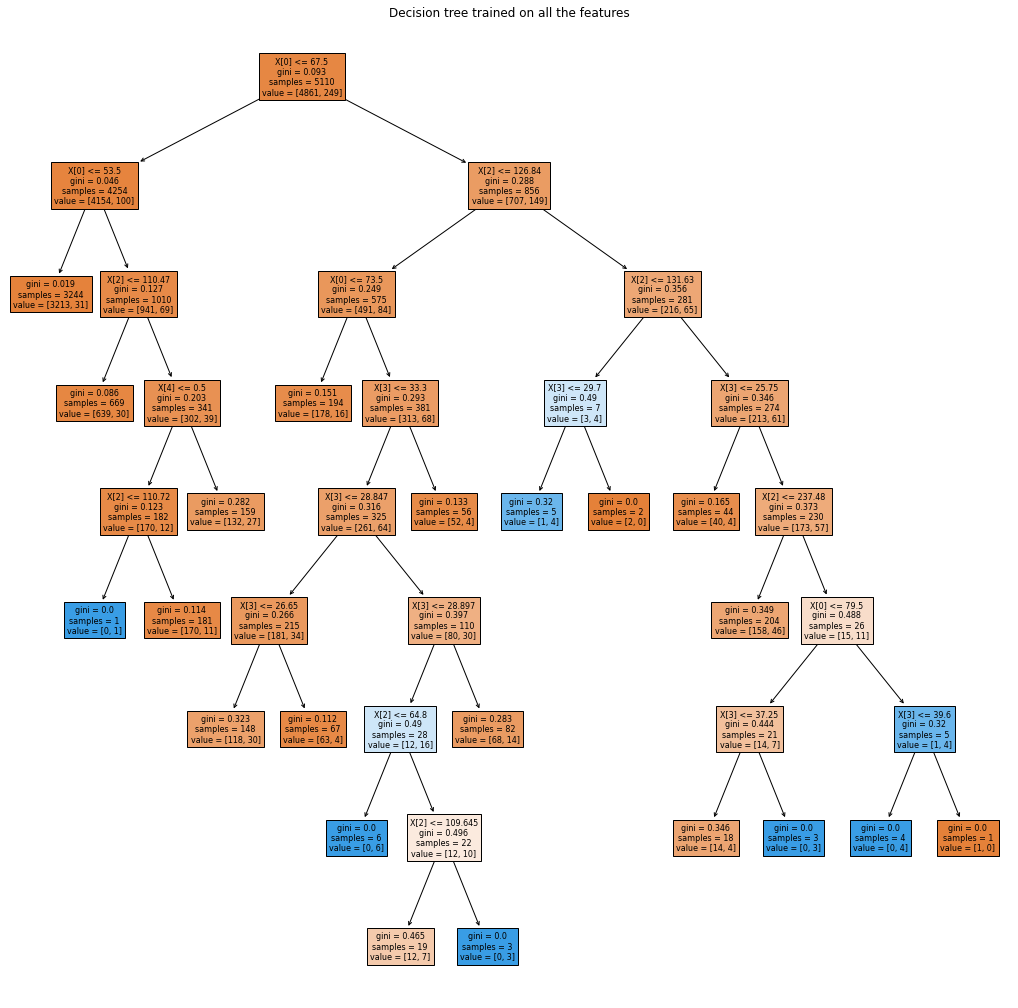

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(18,18))
clf = DecisionTreeClassifier(max_depth= 8,max_leaf_nodes=21,random_state=0).fit(treedata_feature,treedata_target)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the features")
plt.show()

In [ ]:
featurenames = treedata.columns[:5]

In [ ]:
from sklearn.tree import export_graphviz
import graphviz 

treedot = export_graphviz(tree, out_file="tree.dot", class_names= True,
		 feature_names=featurenames,impurity=False, filled=True) 

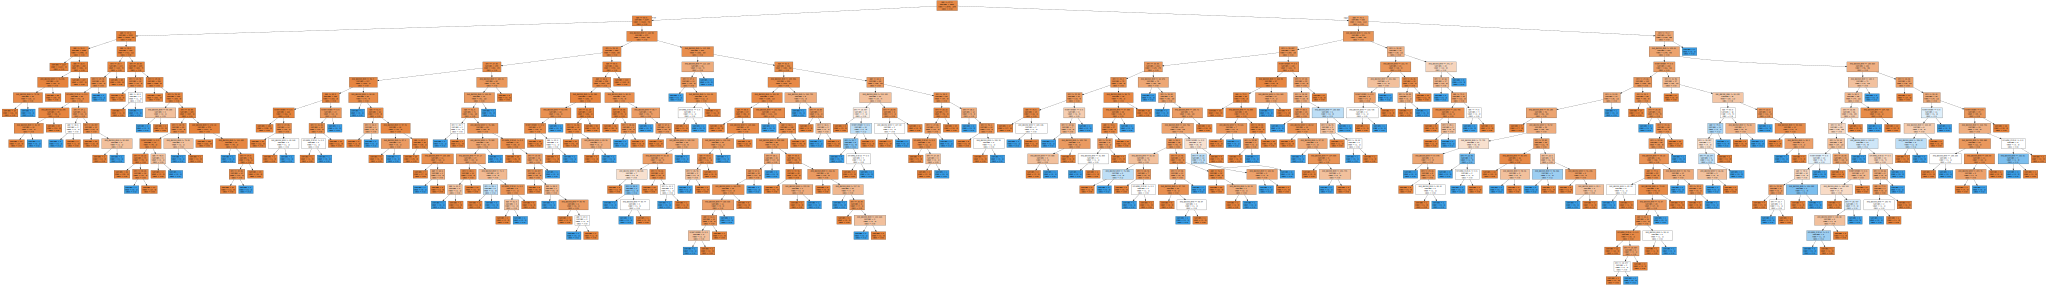

In [ ]:
with open("tree.dot") as f: 
	dot_graph = f.read() 
graphviz.Source(dot_graph)

In [ ]:
tree = DecisionTreeClassifier(max_depth= 8,max_leaf_nodes=21,random_state=0) 
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test))) 

Accuracy on training set: 0.956
Accuracy on test set: 0.949


In [ ]:
treedot = export_graphviz(tree, out_file="treee.dot", class_names= True,
		 feature_names=featurenames,impurity=False, filled=True)

In [ ]:
# import pydotplus
# pydot_graph = pydotplus.graph_from_dot_data(treedot)
# pydot_graph.write_png('original_tree.png')
# pydot_graph.set_size('"20,20!"')
# pydot_graph.write_png('resized_tree.png')

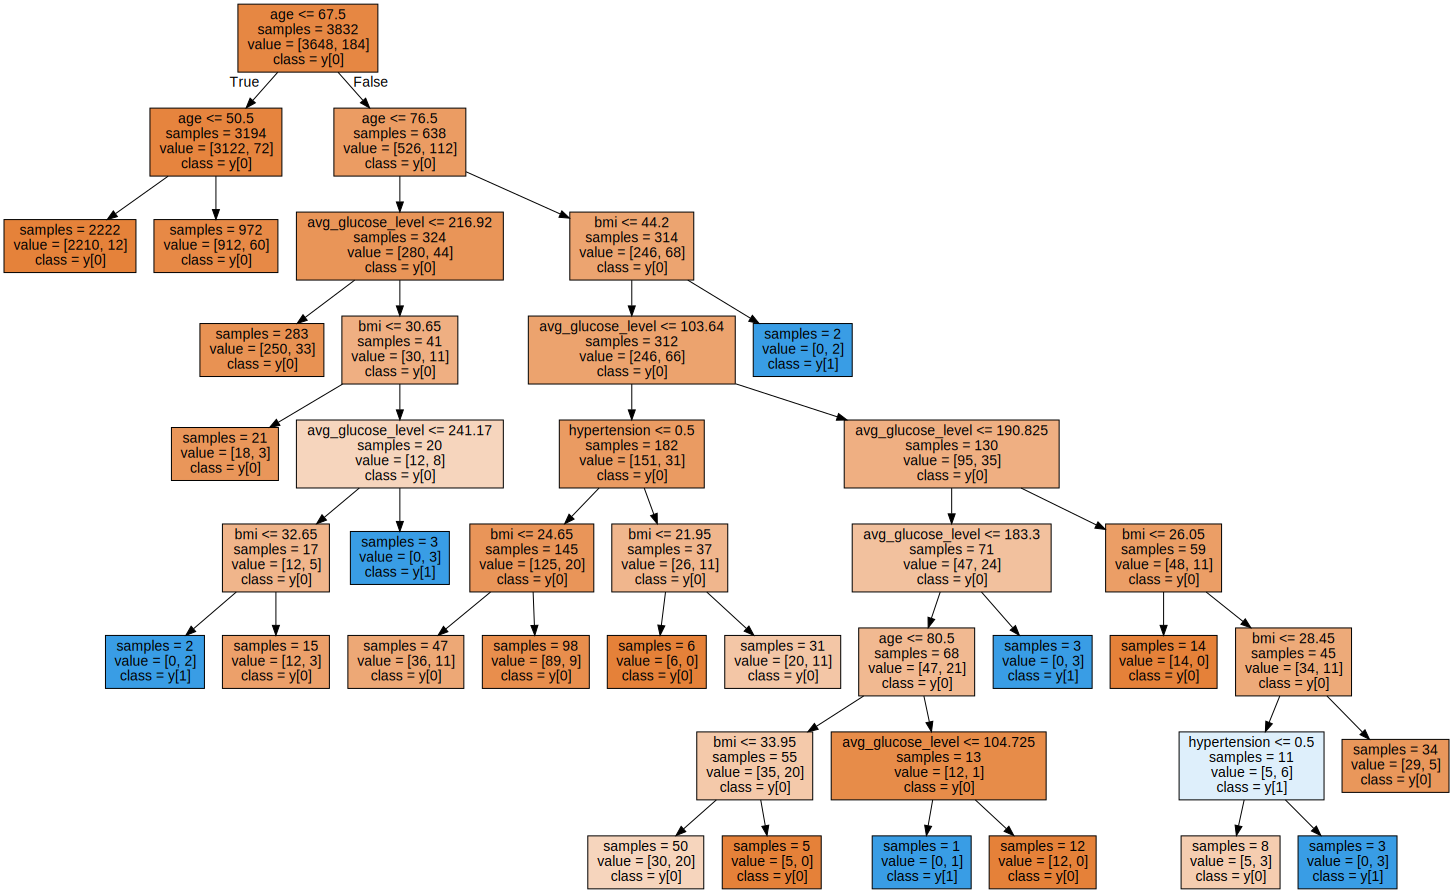

In [ ]:
with open("treee.dot") as f: 
	dot_graph = f.read() 
graphviz.Source(dot_graph)

# **F1 Score**

F1 for logistic regression

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
labels = ['No  Storke', 'Storke']

In [ ]:
y_pred = result.predict(X)

In [ ]:
logreg.fit(X_train,y_train)
y_pred   =  logreg.predict(X_test)

In [ ]:
print("F1 score for logistic regression : ")
print(classification_report(y_test,y_pred,target_names=labels, digits=3))

F1 score for logistic regression : 
              precision    recall  f1-score   support

  No  Storke      0.949     1.000     0.974      1213
      Storke      0.000     0.000     0.000        65

    accuracy                          0.949      1278
   macro avg      0.475     0.500     0.487      1278
weighted avg      0.901     0.949     0.924      1278



F1 for Decision tree

In [ ]:
YPred = tree.predict(X_test) 

In [ ]:
print("F1 score for Decision tree : ")
print(classification_report(YPred,y_test,target_names=labels, digits=3))

F1 score for Decision tree : 
              precision    recall  f1-score   support

  No  Storke      0.998     0.951     0.974      1272
      Storke      0.046     0.500     0.085         6

    accuracy                          0.949      1278
   macro avg      0.522     0.726     0.529      1278
weighted avg      0.993     0.949     0.970      1278

